Hacer Web Scrape Sensacine

CODIGO COMPLETO ALFINAL DEL DOCUMENTO

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def obtener_comentarios_pelicula(id_pelicula, num_paginas, num_comentarios_por_pagina):
    lista_comentarios = []

    for pagina in num_paginas:
        # URL de la página de la película en SensaCine.com
        url = f'https://www.sensacine.com/peliculas/pelicula-{id_pelicula}/criticas-espectadores/?page={pagina}'

        # Realizar la solicitud HTTP a la página de la película
        response = requests.get(url)

        # Crear el objeto BeautifulSoup para analizar el HTML
        soup = BeautifulSoup(response.content, 'html.parser')

        # Encontrar los elementos que contienen los comentarios
        comentarios = soup.find_all('div', class_='content-txt review-card-content')

        # Agregar los comentarios a la lista
        for comentario in comentarios:
            lista_comentarios.append({
                'ID_Pelicula': id_pelicula,
                'Pagina': pagina,
                'Comentario': comentario.text.strip()
            })

    return lista_comentarios

# Lista de IDs de películas y lista de páginas a recorrer
id_peliculas = ['303794', '269975', '247753']
paginas = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
num_comentarios_por_pagina = 6

# Iterar sobre cada ID de película y página, y obtener los comentarios
for id_pelicula in id_peliculas:
    for pagina in paginas:
        comentarios = obtener_comentarios_pelicula(id_pelicula, [pagina], num_comentarios_por_pagina)

        # Imprimir los comentarios obtenidos
        print(f"Comentarios de la película con ID {id_pelicula} - Página {pagina}:")
        for comentario in comentarios:
            print(comentario)
            print()

        print()  # Imprimir línea en blanco para separar las películas y páginas



Comentarios de la película con ID 303794 - Página 2:
{'ID_Pelicula': '303794', 'Pagina': 2, 'Comentario': 'AIR (2023)."Las zapatillas no valen nada hasta que Michael se las pone.”Ben Affleck dirige su quinto largometraje con casi tan buena acogida como “Argo” (2012), y vuelve a unirse para ello con su buen amigo Matt Damon, aunque esta vez no firman el guión como ya hicieran hace un cuarto de siglo en la oscarizada “El Indomable Will Hunting". El exBatman dirige e interpreta, mientras el exBourne protagoniza la historia de cómo la célebre marca deportiva logró contratar al mejor jugador de baloncesto de todos los tiempos para que luciera sus zapatillas Air Jordan."Cuando alguien dice que no es por el dinero ES seguro que es por el dinero."Durante casi dos horas nos cuentan los entresijos y las dificultades que los directivos de Nike tuvieron para convencer a la familia Jordan -con la matriarca a la cabeza- de por qué elegir su marca por delante de las más exitosas Converse y Adidas."Nu

Guardar la data en un csv

In [ ]:
comentarios_totales = []

comentarios_totales.extend(comentarios)

df = pd.DataFrame(comentarios_totales)

df.to_csv('comentarios_peliculas.csv', index=False)

In [ ]:
df.head()

,ID_Pelicula,Pagina,Comentario
0,247753,12,"Mala animación, pésima adaptación, la actuació..."
1,247753,12,"El peor live action de Disney, el CGI barato, ..."
2,247753,12,"Aburrida, extremadamente oscura (no se ve nada..."
3,247753,12,Realmente: el alargue y el final lo peor. Duel...
4,247753,12,"Mala, los efectos malos, la historia no se ase..."


Limpiar los datos

In [ ]:
def limpiar_texto(texto):
    # Convertir el texto a minúsculas
    texto = texto.lower()

    # Eliminar caracteres especiales y signos de puntuación
    texto = re.sub(r'[^a-zA-Z0-9áéíóúüÁÉÍÓÚÜ\s]', '', texto)

    # Tokenizar el texto en palabras
    palabras = word_tokenize(texto)

    # Eliminar palabras irrelevantes (stop words)
    palabras = [palabra for palabra in palabras if palabra not in stopwords.words('spanish')]

    # Unir las palabras nuevamente en un texto limpio
    texto_limpiado = ' '.join(palabras)

    return texto_limpiado



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  ID_Pelicula  Pagina                                         Comentario
0      247753      12  mala animación pésima adaptación actuación dec...
1      247753      12  peor live action disney cgi barato inexpresivi...
2      247753      12  aburrida extremadamente oscura ve escenas actu...
3      247753      12  realmente alargue final peor duele cabeza vari...
4      247753      12  mala efectos malos historia asemeja originalno...
5      247753      12  irónicamente único salva ocasiones película ha...
6      247753      12  película gustó varias escenas obscuras efectos...
7      247753      12  simplemente mala aburrida mitad película cine ...
8      247753      12  película trata ser buena pasa dar partes cgi m...
9      247753      12  momentos parece película terror hace eterna ad...


Agregar analisis de sentimiento

In [ ]:

def analizar_sentimiento(texto):
    # Crear el objeto SentimentIntensityAnalyzer
    sid = SentimentIntensityAnalyzer()

    # Obtener el puntaje de sentimiento del texto
    puntaje = sid.polarity_scores(texto)

    # Asignar una etiqueta según el puntaje de sentimiento
    if puntaje['compound'] >= 0.05:
        return 'Positivo'
    elif puntaje['compound'] <= -0.05:
        return 'Negativo'
    else:
        return 'Neutro'


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


    ID_Pelicula  Pagina                                         Comentario  \
0        303794       2  AIR 2023Las zapatillas valen Michael poneBen A...   
1        303794       2  Air maravillosa espectacular gustado muchísimo...   
2        303794       2  Vi cinta 1ro Abril función especial Preestreno...   
3        303794       3  AIR 2023Las zapatillas valen Michael poneBen A...   
4        303794       3  Air maravillosa espectacular gustado muchísimo...   
..          ...     ...                                                ...   
160      247753      12  El peor live action Disney CGI barato inexpres...   
161      247753      12  Aburrida extremadamente oscura ve escenas actu...   
162      247753      12  Realmente alargue final peor Duele cabeza vari...   
163      247753      12  Mala efectos malos historia asemeja originalNo...   
164      247753      12  Irónicamente único salva ocasiones película Ha...   

    Sentimiento                             Fecha  
0      Posi

Crear Graficos

In [ ]:
# Gráfico de barras para mostrar la distribución de sentimientos en general
plt.figure(figsize=(8, 6))
df['Sentimiento'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribución de Sentimientos (General)')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Comentarios')
plt.show()

# Gráficos de barras para mostrar la distribución de sentimientos por película
for id_pelicula in id_peliculas:
    plt.figure(figsize=(8, 6))
    df_pelicula = df[df['ID_Pelicula'] == id_pelicula]
    df_pelicula['Sentimiento'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
    plt.title(f'Distribución de Sentimientos (Película {id_pelicula})')
    plt.xlabel('Sentimiento')
    plt.ylabel('Cantidad de Comentarios')
    plt.show()

# Gráficos de líneas para mostrar la evolución del sentimiento a lo largo del tiempo
for id_pelicula in id_peliculas:
    plt.figure(figsize=(10, 6))
    df_pelicula = df[df['ID_Pelicula'] == id_pelicula]
    df_pelicula = df_pelicula.sort_values(by='Fecha')
    plt.plot(df_pelicula['Fecha'], df_pelicula['Sentimiento'].apply(lambda x: 1 if x == 'Positivo' else (-1 if x == 'Negativo' else 0)), marker='o')
    plt.title(f'Evolución del Sentimiento (Película {id_pelicula})')
    plt.xlabel('Fecha')
    plt.ylabel('Sentimiento')
    plt.xticks(rotation=45)
    plt.yticks([-1, 0, 1], ['Negativo', 'Neutro', 'Positivo'])
    plt.grid(True)
    plt.show()

# CODIGO COMPLETO



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


    ID_Pelicula  Pagina                                         Comentario  \
0        186636       2  Top Gun Maverick opinión entraría top mejores ...   
1        186636       2  Toda maquinaria Hollywood actual puesto servic...   
2        186636       2  Top Gun amo ver película Un Soundtrack increíb...   
3        186636       2  Simplemente excelente Acción continua nostalgi...   
4        186636       2  Es película dejado buenas impresiones respecto...   
..          ...     ...                                                ...   
276      247753      12  Me encanto película efectos visuales partes mu...   
277      247753      12  Es pasada Te hace volver infancia llenarte nos...   
278      247753      12  Realmente alargue final peor Duele cabeza vari...   
279      247753      12  Mala efectos malos historia asemeja originalNo...   
280      247753      12  Irónicamente único salva ocasiones película Ha...   

    Sentimiento       Fecha  
0      Negativo  2023-01-23  
1  

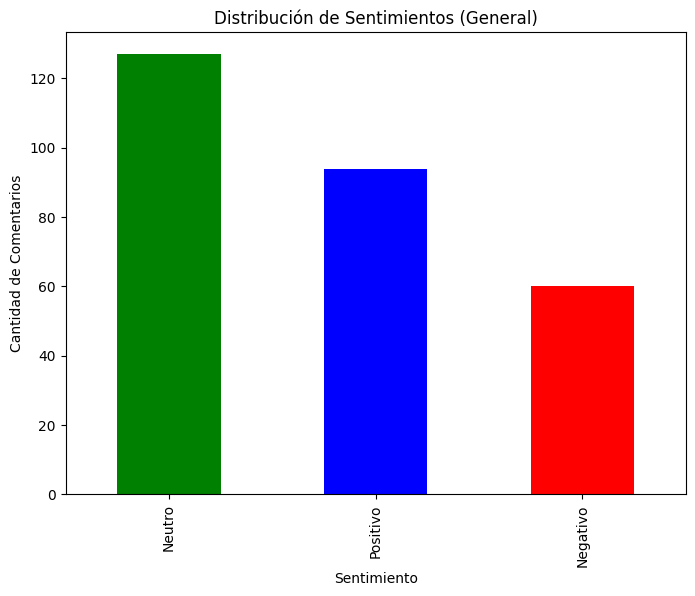

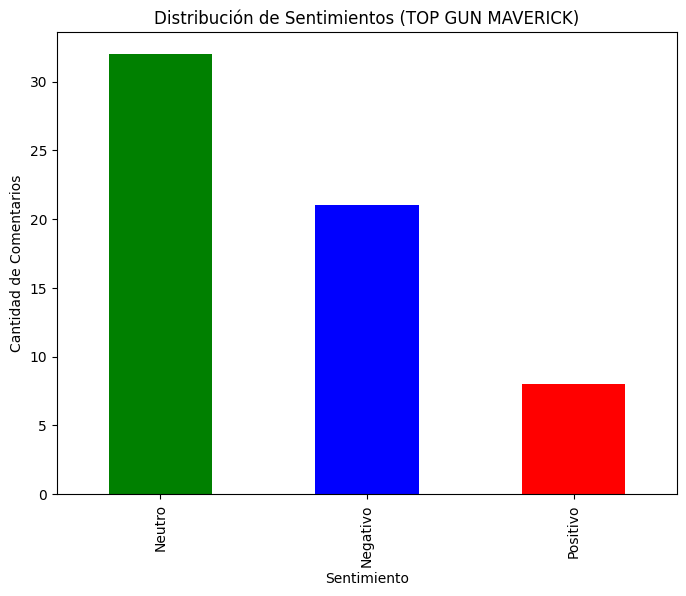

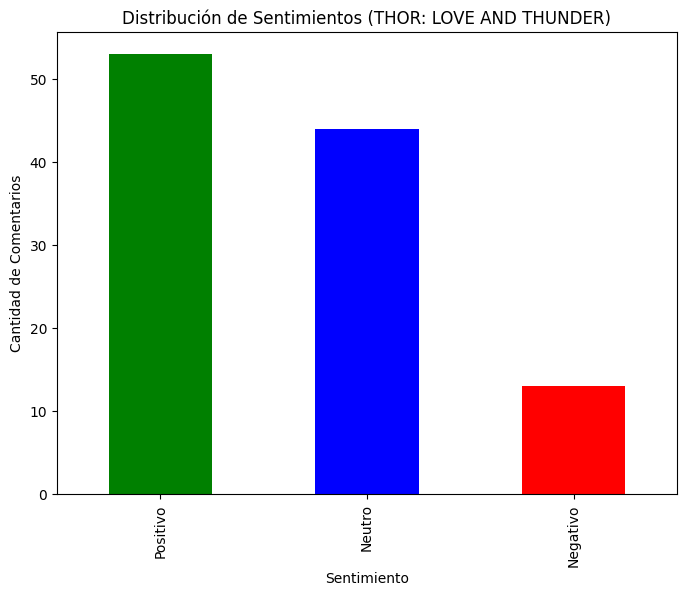

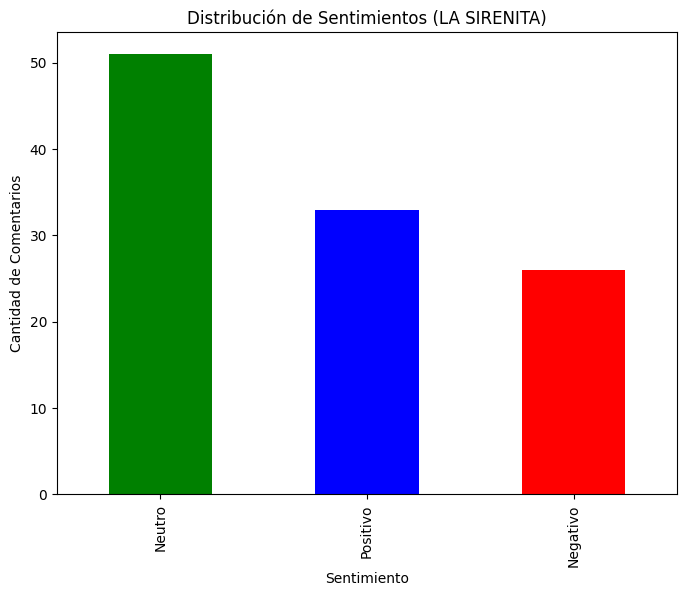

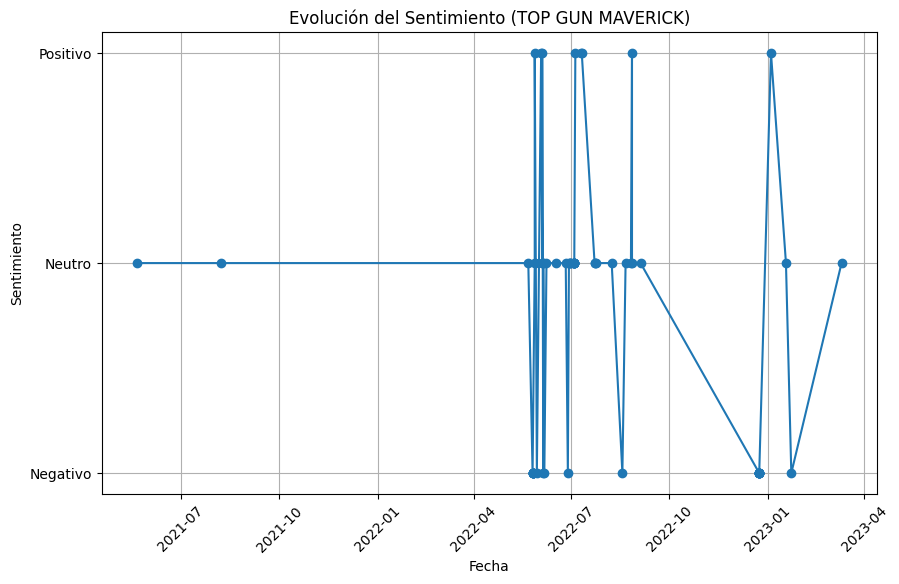

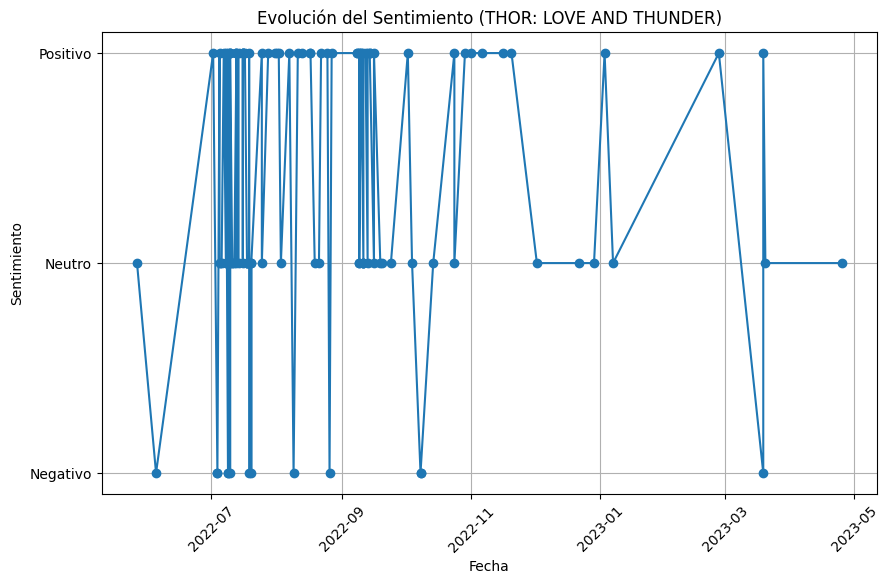

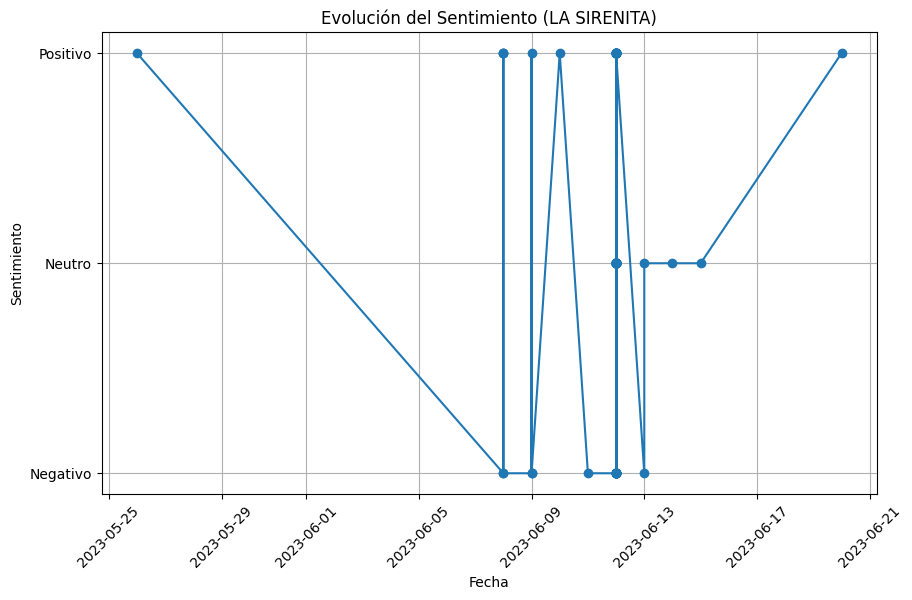

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from datetime import datetime
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

def obtener_comentarios_pelicula(id_pelicula, num_paginas, num_comentarios_por_pagina):
    lista_comentarios = []

    for pagina in num_paginas:
        # URL de la página de la película en SensaCine.com
        url = f'https://www.sensacine.com/peliculas/pelicula-{id_pelicula}/criticas-espectadores/?page={pagina}'

        # Realizar la solicitud HTTP a la página de la película
        response = requests.get(url)

        # Crear el objeto BeautifulSoup para analizar el HTML
        soup = BeautifulSoup(response.content, 'html.parser')

        # Encontrar los elementos que contienen los comentarios y las fechas
        comentarios = soup.find_all('div', class_='content-txt review-card-content')
        fechas = soup.find_all('span', class_='review-card-meta-date light')

        # Limitar la cantidad de comentarios según el parámetro num_comentarios_por_pagina
        comentarios = comentarios[:num_comentarios_por_pagina]
        fechas = fechas[:num_comentarios_por_pagina]

        # Agregar los comentarios a la lista junto con el ID de la película, la página y la fecha
        for comentario, fecha in zip(comentarios, fechas):
            # Limpiar el comentario
            comentario_limpiado = limpiar_texto(comentario.text.strip())

            # Analizar el sentimiento del comentario
            sentimiento = analizar_sentimiento(comentario_limpiado)

            # Extraer la fecha del formato de string original
            fecha_string = fecha.text.strip()
            fecha_extraida = obtener_fecha(fecha_string)

            lista_comentarios.append({
                'ID_Pelicula': id_pelicula,
                'Pagina': pagina,
                'Comentario': comentario_limpiado,
                'Sentimiento': sentimiento,
                'Fecha': fecha_extraida
            })

    return lista_comentarios

def obtener_fecha(fecha_string):
    # Dividir la cadena de texto en palabras
    palabras = fecha_string.split()

    # Obtener el día y el mes
    dia = int(palabras[2])
    mes = obtener_numero_mes(palabras[4])

    # Obtener el año eliminando el texto no numérico
    año = int(re.sub('[^0-9]', '', palabras[6]))

    # Crear la fecha utilizando los componentes extraídos
    fecha_convertida = datetime(año, mes, dia).date()

    return fecha_convertida

def obtener_numero_mes(nombre_mes):
    meses = {
        'enero': 1,
        'febrero': 2,
        'marzo': 3,
        'abril': 4,
        'mayo': 5,
        'junio': 6,
        'julio': 7,
        'agosto': 8,
        'septiembre': 9,
        'octubre': 10,
        'noviembre': 11,
        'diciembre': 12
    }
    return meses[nombre_mes.lower()]

def limpiar_texto(texto):
    # Eliminar caracteres especiales y signos de puntuación
    texto = re.sub(r'[^a-zA-Z0-9áéíóúüÁÉÍÓÚÜ\s]', '', texto)

    # Tokenizar el texto en palabras
    palabras = word_tokenize(texto)

    # Eliminar palabras irrelevantes (stop words)
    palabras = [palabra for palabra in palabras if palabra not in stopwords.words('spanish')]

    # Unir las palabras nuevamente en un texto limpio
    texto_limpiado = ' '.join(palabras)

    return texto_limpiado

def analizar_sentimiento(texto):
    # Crear el objeto SentimentIntensityAnalyzer
    sid = SentimentIntensityAnalyzer()

    # Obtener el puntaje de sentimiento del texto
    puntaje = sid.polarity_scores(texto)

    # Asignar una etiqueta según el puntaje de sentimiento
    if puntaje['compound'] >= 0.05:
        return 'Positivo'
    elif puntaje['compound'] <= -0.05:
        return 'Negativo'
    else:
        return 'Neutro'

# Lista de IDs de películas y lista de páginas a recorrer
id_peliculas = ['186636', '275207', '247753']
paginas = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
num_comentarios_por_pagina = 10

# Crear una lista para almacenar todos los comentarios
comentarios_totales = []

# Iterar sobre cada ID de película y página, y obtener los comentarios
for id_pelicula in id_peliculas:
    comentarios_por_pagina = obtener_comentarios_pelicula(id_pelicula, paginas, num_comentarios_por_pagina)

    # Agregar los comentarios obtenidos a la lista de comentarios totales
    comentarios_totales.extend(comentarios_por_pagina)

# Crear un DataFrame con los comentarios
df = pd.DataFrame(comentarios_totales, columns=['ID_Pelicula', 'Pagina', 'Comentario', 'Sentimiento', 'Fecha'])

# Guardar el DataFrame en un archivo CSV
df.to_csv('comentarios_peliculas.csv', index=False)

# Imprimir el dataset
print(df)

# Gráfico de barras para mostrar la distribución de sentimientos en general
plt.figure(figsize=(8, 6))
df['Sentimiento'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Distribución de Sentimientos (General)')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Comentarios')
plt.show()

#Nombre de las peliculas por codigo
nombres_peliculas = {
    '186636': 'TOP GUN MAVERICK',
    '275207': 'THOR: LOVE AND THUNDER',
    '247753': 'LA SIRENITA'
}

# Gráficos de barras para mostrar la distribución de sentimientos por película
for id_pelicula in id_peliculas:
    nombre_pelicula = nombres_peliculas.get(id_pelicula, id_pelicula)
    plt.figure(figsize=(8, 6))
    df_pelicula = df[df['ID_Pelicula'] == id_pelicula]
    sentimiento_counts = df_pelicula['Sentimiento'].value_counts()
    colors = ['green', 'blue', 'red']  # Asignar colores específicos a cada sentimiento

    sentimiento_counts.plot(kind='bar', color=colors)
    plt.title(f'Distribución de Sentimientos ({nombre_pelicula})')
    plt.xlabel('Sentimiento')
    plt.ylabel('Cantidad de Comentarios')
    plt.show()


# Gráficos de líneas para mostrar la evolución del sentimiento a lo largo del tiempo
for id_pelicula in id_peliculas:
    nombre_pelicula = nombres_peliculas.get(id_pelicula, id_pelicula)
    plt.figure(figsize=(10, 6))
    df_pelicula = df[df['ID_Pelicula'] == id_pelicula]
    df_pelicula = df_pelicula.sort_values(by='Fecha')
    plt.plot(df_pelicula['Fecha'], df_pelicula['Sentimiento'].apply(lambda x: 1 if x == 'Positivo' else (-1 if x == 'Negativo' else 0)), marker='o')
    plt.title(f'Evolución del Sentimiento ({nombre_pelicula})')
    plt.xlabel('Fecha')
    plt.ylabel('Sentimiento')
    plt.xticks(rotation=45)
    plt.yticks([-1, 0, 1], ['Negativo', 'Neutro', 'Positivo'])
    plt.grid(True)
    plt.show()

In [ ]:
df.head()

,ID_Pelicula,Pagina,Comentario,Sentimiento,Fecha
0,186636,2,Top Gun Maverick opinión entraría top mejores ...,Negativo,2023-01-23
1,186636,2,Toda maquinaria Hollywood actual puesto servic...,Negativo,2022-08-18
2,186636,2,Top Gun amo ver película Un Soundtrack increíb...,Negativo,2022-05-30
3,186636,2,Simplemente excelente Acción continua nostalgi...,Negativo,2022-06-06
4,186636,2,Es película dejado buenas impresiones respecto...,Negativo,2022-06-28


In [ ]:
import pandas as pd
from google.colab import files

# Export the DataFrame to CSV
df.to_csv('BIG_DATA_Pelis.csv', index=False)

# Download the CSV file
files.download('BIG_DATA_Pelis.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# CONCLUSION

https://docs.google.com/presentation/d/1FlMeNauMXPoXOTS3yYPokgFEHX1sclWCztM1UlqqlG8/edit?usp=sharing